In [62]:
import pandas as pd

In [63]:
vacancies_2020 = pd.read_csv('data/vacancies_2020.csv')
vacancies_2024 = pd.read_csv('data/vacancies_2024.csv')

vacancies_2020_saved = vacancies_2020.copy()
vacancies_2024_saved = vacancies_2024.copy()

In [64]:
vacancies_2020 = vacancies_2020_saved.copy()
vacancies_2024 = vacancies_2024_saved.copy()

              id                                        description  \
1331    38960875  <p>Набор на курсы</p> <p>09.2020-10.2020</p> <...   
2359    39340414  <p>Компания «Сбербанк Технологии» сейчас в пои...   
2387    39340749  <p>Уже более восьми лет мы погружаемся в тему ...   
2388    39340769  <p>Уже более восьми лет мы погружаемся в тему ...   
2392    39340785  <p>Уже более восьми лет мы погружаемся в тему ...   
...          ...                                                ...   
581963  38033408  <p>Мы находимся в поиске Data Engineer&#39;a в...   
582107  38034886  <p><strong>BP Mobile</strong> - компания, кото...   
582456  38037678  <p><em>Ищем опытного <strong>Аналитика</strong...   
582489  38037985  <p>Медиалогия разрабатывает высоконагруженные ...   
582537  38038853  <p>В связи с расширением портфеля задач мы отк...   

                                               key_skills schedule_id  \
1331                  Node.js\nHTML\nCSS\nJavaScript\nGit     fullDay   
2

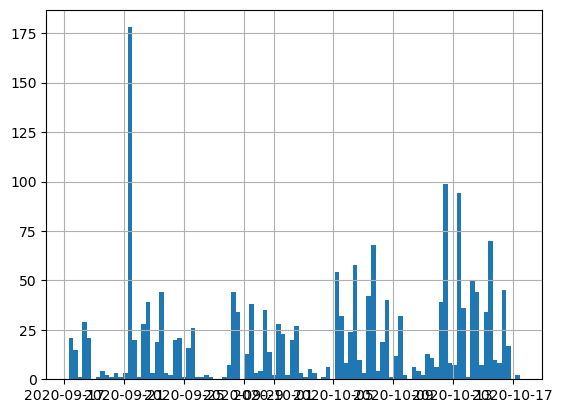

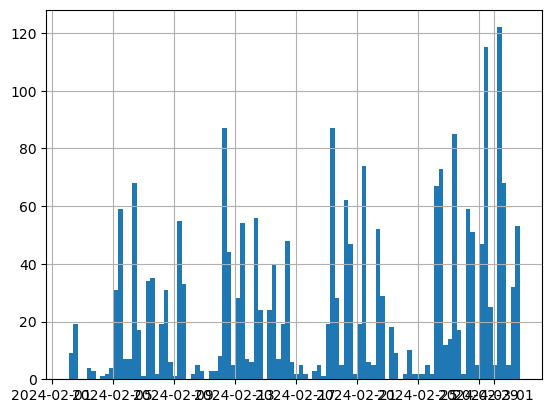

In [65]:
# vacancies_2020 = vacancies_2020[vacancies_2020['name'].str.contains('Data scientist|Data analyst|ML|AI|Machine Learning|Artificial Intelligence|Аналитик данных|Data Engineer|Инженер данных|Reinforcement learning|Аналитик-исследователь|Нейросеть|Искусственный интеллект|Машинное обучение', case=False, na=False)]

# vacancies_2020 = vacancies_2020[vacancies_2020['name'].str.contains("'Data scientist'|'Data analyst'|'ML'|'AI'|'Machine Learning'|'Artificial Intelligence'|'Аналитик данных'|'Data Engineer'|'Инженер данных'|'Reinforcement learning'|'Аналитик-исследователь'|'Нейросеть'|'Искусственный интеллект'|'Машинное обучение'", case=False, na=False)]

# vacancies_2020 = vacancies_2020[vacancies_2020['name'].str.contains('Data scientist', case=False, na=False) | vacancies_2020['name'].str.contains('Data analyst', case=False, na=False) | vacancies_2020['name'].str.contains('ML', case=False, na=False) | vacancies_2020['name'].str.contains('AI', case=False, na=False) | vacancies_2020['name'].str.contains('Machine Learning', case=False, na=False) | vacancies_2020['name'].str.contains('Artificial Intelligence', case=False, na=False) | vacancies_2020['name'].str.contains('Аналитик данных', case=False, na=False) | vacancies_2020['name'].str.contains('Data Engineer', case=False, na=False) | vacancies_2020['name'].str.contains('Инженер данных', case=False, na=False) | vacancies_2020['name'].str.contains('Reinforcement learning', case=False, na=False) | vacancies_2020['name'].str.contains('Аналитик-исследователь', case=False, na=False) | vacancies_2020['name'].str.contains('Нейросеть', case=False, na=False) | vacancies_2020['name'].str.contains('Искусственный интеллект', case=False, na=False) | vacancies_2020['name'].str.contains('Машинное обучение', case=False, na=False)]

# filter the data to get only vacancies with the following keywords or keyword pairs in the name
strings_to_filter = ['Data scientist', 'Data analyst', 'ML', 'AI', 'Machine Learning', 'Artificial Intelligence', 'Аналитик данных', 'Data Engineer', 'Инженер данных', 'Reinforcement learning', 'Аналитик-исследователь', 'Нейросеть', 'Искусственный интеллект', 'Машинное обучение']
vacancies_2020 = vacancies_2020[vacancies_2020['name'].str.contains('|'.join(strings_to_filter), case=False, na=False)]

# drop archived vacancies
vacancies_2020 = vacancies_2020[vacancies_2020['archived'] == False]
vacancies_2024 = vacancies_2024[vacancies_2024['archived'] == False]

print(vacancies_2020)
print(vacancies_2024)
print(vacancies_2020['area_id'].nunique())
print(vacancies_2024['area'].nunique())

# plot the distribution of published_at
import matplotlib.pyplot as plt

# use x as the date and y as the count of vacancies
vacancies_2020['published_at'] = pd.to_datetime(vacancies_2020['published_at'])
vacancies_2024['published_at'] = pd.to_datetime(vacancies_2024['published_at'])

vacancies_2020 = vacancies_2020['2020-09-17' < vacancies_2020['published_at']]
vacancies_2020 = vacancies_2020[vacancies_2020['published_at'] < '2020-10-18']

# minimum and maximum published_at
print(vacancies_2020['published_at'].min())
print(vacancies_2020['published_at'].max())
print(vacancies_2024['published_at'].min())
print(vacancies_2024['published_at'].max())

vacancies_2020['published_at'].hist(bins=100)
plt.show()

vacancies_2024['published_at'].hist(bins=100)
plt.show()

In [66]:
# print 3 rows with all columns for both dataframes, not just some columns
cols = vacancies_2020.columns
for col in cols:
    print(col)
    print(vacancies_2020[col].head(3))

print(vacancies_2020.info())

print(vacancies_2020['key_skills'][1331])

id
1331    38960875
2359    39340414
2387    39340749
Name: id, dtype: int64
description
1331    <p>Набор на курсы</p> <p>09.2020-10.2020</p> <...
2359    <p>Компания «Сбербанк Технологии» сейчас в пои...
2387    <p>Уже более восьми лет мы погружаемся в тему ...
Name: description, dtype: object
key_skills
1331                  Node.js\nHTML\nCSS\nJavaScript\nGit
2359    Hibernate ORM\nJava Servlets\nSpring Framework...
2387    Python\nAgile Project Management\nРазработка т...
Name: key_skills, dtype: object
schedule_id
1331    fullDay
2359    fullDay
2387    fullDay
Name: schedule_id, dtype: object
schedule_name
1331    Полный день
2359    Полный день
2387    Полный день
Name: schedule_name, dtype: object
accept_handicapped
1331    False
2359    False
2387    False
Name: accept_handicapped, dtype: bool
accept_kids
1331    False
2359    False
2387    False
Name: accept_kids, dtype: bool
experience_id
1331    noExperience
2359    between1And3
2387       moreThan6
Name: experience_id, dty

In [67]:
cols = vacancies_2024.columns
for col in cols:
    print(col)
    print(vacancies_2024[col].tail(3))

print(vacancies_2024.info())

Unnamed: 0
2286    2286
2287    2287
2288    2288
Name: Unnamed: 0, dtype: int64
id
2286    92026913
2287    93680579
2288    91237923
Name: id, dtype: int64
premium
2286    False
2287    False
2288    False
Name: premium, dtype: bool
name
2286                                        Data engineer
2287    Продакт Разработчик Python/React, AI OPS(Удале...
2288              Senior Data Analyst in Technology group
Name: name, dtype: object
department
2286    NaN
2287    NaN
2288    NaN
Name: department, dtype: object
has_test
2286    False
2287    False
2288    False
Name: has_test, dtype: bool
response_letter_required
2286    False
2287    False
2288    False
Name: response_letter_required, dtype: bool
area
2286    {'id': '2759', 'name': 'Ташкент', 'url': 'http...
2287    {'id': '2759', 'name': 'Ташкент', 'url': 'http...
2288    {'id': '2759', 'name': 'Ташкент', 'url': 'http...
Name: area, dtype: object
salary
2286                                                  NaN
2287    {'from': 2200

In [68]:
# all columns that not mentioned are dropped

# 'premium' - don't change
# 'name' - don't change
# 'department' - take id and name (from 2024) and department_id and department_name (from 2020)
# 'has_test' - don't change
# 'response_letter_required' - don't change
# 'area' - get only id and name (from j2024) and area_id and area_name (from 2020)
# 'salary' - get all columns (from 2024) and salary_from, salary_to, salary_currency, salary_gross (from 2020)
# 'type' - get only id (from 2024) and type_id (from 2020)
# 'address' - reformat to get only bool value if it's not null for 2024 and drop for 2020, adding a new column 'is_address' with the bool value
# 'insider_interview' - reformat to get only bool value if it's not null for 2024 and drop for 2020, adding a new column 'is_insider_interview' with the bool value
# 'employer' - get only name (from 2024) and employer_id and employer_name (from 2020) because the id is the same for both dataframes for the same employer and there is a problem with id format in 2024
# 'schedule' - get only id (from 2024) and schedule_id (from 2020)
# 'experience' - get only id (from 2024) and experience_id (from 2020)
# 'employment' - get only id (from 2024) and employment_id (from 2020)


adjusted_2020 = vacancies_2020[['premium', 'name', 'department_id', 'department_name', 'area_id', 'area_name', 'has_test', 'response_letter_required', 'salary_from', 'salary_to', 'salary_currency', 'salary_gross', 'type_id', 'address_city', 'insider_interview', 'employer_name', 'schedule_id', 'experience_id', 'employment_id']]
adjusted_2024 = vacancies_2024[['premium', 'name', 'department', 'area', 'has_test', 'response_letter_required', 'salary', 'type', 'address', 'insider_interview', 'employer', 'schedule', 'experience', 'employment']]


def get_columns_from_json(df, column_name, needed_columns):
    df[column_name] = df[column_name].apply(lambda x: eval(x) if pd.notnull(x) else x)
    for i, column in enumerate(needed_columns):
        df[f'{column_name}_{column}'] = df[column_name].apply(lambda x: x[column] if pd.notnull(x) else x)
    df = df.drop(columns=[column_name])
    return df


adjusted_2024 = get_columns_from_json(adjusted_2024, 'department', ['id', 'name'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'area', ['id', 'name'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'salary', ['from', 'to', 'currency', 'gross'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'type', ['id'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'employer', ['name'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'schedule', ['id'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'experience', ['id'])
adjusted_2024 = get_columns_from_json(adjusted_2024, 'employment', ['id'])

adjusted_2024['is_address'] = adjusted_2024['address'].notnull()
adjusted_2024 = adjusted_2024.drop(columns=['address'])
adjusted_2020['is_address'] = adjusted_2020['address_city'].notnull()
adjusted_2020 = adjusted_2020.drop(columns=['address_city'])
adjusted_2024['is_insider_interview'] = adjusted_2024['insider_interview'].notnull()
adjusted_2024 = adjusted_2024.drop(columns=['insider_interview'])
adjusted_2020['is_insider_interview'] = adjusted_2020['insider_interview'].notnull()
adjusted_2020 = adjusted_2020.drop(columns=['insider_interview'])

print(adjusted_2024)

C:\Users\sasha\AppData\Local\Temp\ipykernel_13132\1549831474.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(lambda x: eval(x) if pd.notnull(x) else x)
C:\Users\sasha\AppData\Local\Temp\ipykernel_13132\1549831474.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column_name}_{column}'] = df[column_name].apply(lambda x: x[column] if pd.notnull(x) else x)
C:\Users\sasha\AppData\Local\Temp\ipykernel_13132\1549831474.py:26: SettingWithCopyWarning: 
A value i

      premium                                               name  has_test  \
0       False                              Junior Data Scientist     False   
1       False                              Junior Data Scientist     False   
2       False                               Junior Data Engineer     False   
3       False                              Junior Data Scientist     False   
4       False  Разработчик операций AI, Python/React (Удаленн...     False   
...       ...                                                ...       ...   
2284    False  Системный аналитик отдела бизнес данных и сист...     False   
2285    False                                Senior Data Analyst     False   
2286    False                                      Data engineer     False   
2287    False  Продакт Разработчик Python/React, AI OPS(Удале...     False   
2288    False            Senior Data Analyst in Technology group     False   

      response_letter_required department_id department_name ar

C:\Users\sasha\AppData\Local\Temp\ipykernel_13132\1549831474.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_2020['is_address'] = adjusted_2020['address_city'].notnull()


In [69]:
adjusted_2020.head(50)

,premium,name,department_id,department_name,area_id,area_name,has_test,response_letter_required,salary_from,salary_to,salary_currency,salary_gross,type_id,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview
1331,False,Junior Full-stack JS Developer/Trainee (Mogilev),NaN,NaN,1004,Могилев,False,False,NaN,NaN,NaN,NaN,open,iTechArt Group,fullDay,noExperience,probation,True,False
2359,False,Ведущий разработчик backend Java (Teamlead),3529-3529-it,Сбер. IT,1,Москва,False,False,NaN,NaN,NaN,NaN,open,Сбербанк,fullDay,between1And3,full,False,False
2387,False,Team Lead/Senior Data Scientist,NaN,NaN,3,Екатеринбург,False,False,NaN,NaN,NaN,NaN,open,СКБ Контур,fullDay,moreThan6,full,True,False
2388,False,Team Lead/Senior Data Scientist,NaN,NaN,2,Санкт-Петербург,False,False,NaN,NaN,NaN,NaN,open,СКБ Контур,fullDay,moreThan6,full,False,False
2392,False,Team Lead/Senior Data Scientist,NaN,NaN,1,Москва,False,False,NaN,NaN,NaN,NaN,open,СКБ Контур,fullDay,moreThan6,full,False,False
2463,False,Team Lead/Senior Data Analyst. Аналитик данных,3529-3529-prof,Сбер для экспертов,3,Екатеринбург,False,False,NaN,NaN,NaN,NaN,open,Сбербанк,fullDay,between1And3,full,False,False
2526,False,Data scientist (NLP) - Sberbank AI Lab,3529-3529-prof,Сбер для экспертов,1,Москва,False,False,NaN,NaN,NaN,NaN,open,Сбербанк,fullDay,between1And3,full,False,False
2533,False,Data Engineer (Information Retrieval Team),NaN,NaN,1002,Минск,False,False,NaN,NaN,NaN,NaN,open,IHS Global,fullDay,between3And6,full,True,False
2535,False,Senior Data Scientist (Computer Vision),NaN,NaN,1002,Минск,False,False,NaN,NaN,NaN,NaN,open,IHS Global,fullDay,between3And6,full,True,False
2540,False,"Специалист службы поддержки со знанием JS, HTM...",NaN,NaN,1485,Ессентуки,False,False,30000.0,NaN,RUR,True,open,Яндекс,shift,between1And3,part,False,False


In [75]:
# count number of 'Специалист службы поддержки со знанием JS, HTML, Python' in column 'name'
print(adjusted_2020['name'].str.contains('Специалист службы поддержки со знанием JS, HTML, Python').sum())

0


In [76]:
# delete the rows with the name 'Специалист службы поддержки со знанием JS, HTML, Python'
adjusted_2020 = adjusted_2020[~adjusted_2020['name'].str.contains('Специалист службы поддержки со знанием JS, HTML, Python')]
adjusted_2020.head(50)

,premium,name,department_id,department_name,area_id,area_name,has_test,response_letter_required,salary_from,salary_to,salary_currency,salary_gross,type_id,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview
1331,False,Junior Full-stack JS Developer/Trainee (Mogilev),NaN,NaN,1004,Могилев,False,False,NaN,NaN,NaN,NaN,open,iTechArt Group,fullDay,noExperience,probation,True,False
2359,False,Ведущий разработчик backend Java (Teamlead),3529-3529-it,Сбер. IT,1,Москва,False,False,NaN,NaN,NaN,NaN,open,Сбербанк,fullDay,between1And3,full,False,False
2387,False,Team Lead/Senior Data Scientist,NaN,NaN,3,Екатеринбург,False,False,NaN,NaN,NaN,NaN,open,СКБ Контур,fullDay,moreThan6,full,True,False
2388,False,Team Lead/Senior Data Scientist,NaN,NaN,2,Санкт-Петербург,False,False,NaN,NaN,NaN,NaN,open,СКБ Контур,fullDay,moreThan6,full,False,False
2392,False,Team Lead/Senior Data Scientist,NaN,NaN,1,Москва,False,False,NaN,NaN,NaN,NaN,open,СКБ Контур,fullDay,moreThan6,full,False,False
2463,False,Team Lead/Senior Data Analyst. Аналитик данных,3529-3529-prof,Сбер для экспертов,3,Екатеринбург,False,False,NaN,NaN,NaN,NaN,open,Сбербанк,fullDay,between1And3,full,False,False
2526,False,Data scientist (NLP) - Sberbank AI Lab,3529-3529-prof,Сбер для экспертов,1,Москва,False,False,NaN,NaN,NaN,NaN,open,Сбербанк,fullDay,between1And3,full,False,False
2533,False,Data Engineer (Information Retrieval Team),NaN,NaN,1002,Минск,False,False,NaN,NaN,NaN,NaN,open,IHS Global,fullDay,between3And6,full,True,False
2535,False,Senior Data Scientist (Computer Vision),NaN,NaN,1002,Минск,False,False,NaN,NaN,NaN,NaN,open,IHS Global,fullDay,between3And6,full,True,False
2591,False,Senior Ruby on Rails Developer,NaN,NaN,27,Германия,False,False,220000.0,365000.0,RUR,False,open,SwitchUp,remote,moreThan6,full,True,False


In [77]:
adjusted_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 1331 to 582456
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   premium                   1696 non-null   bool   
 1   name                      1696 non-null   object 
 2   department_id             225 non-null    object 
 3   department_name           225 non-null    object 
 4   area_id                   1696 non-null   int64  
 5   area_name                 1696 non-null   object 
 6   has_test                  1696 non-null   bool   
 7   response_letter_required  1696 non-null   bool   
 8   salary_from               332 non-null    float64
 9   salary_to                 231 non-null    float64
 10  salary_currency           388 non-null    object 
 11  salary_gross              388 non-null    object 
 12  type_id                   1696 non-null   object 
 13  employer_name             1696 non-null   object 
 14  sch

In [73]:
adjusted_2024.head()

,premium,name,has_test,response_letter_required,department_id,department_name,area_id,area_name,salary_from,salary_to,salary_currency,salary_gross,type_id,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview
0,False,Junior Data Scientist,False,False,NaN,NaN,74,Польша,NaN,NaN,NaN,NaN,open,HIRE5 INC,remote,between1And3,full,False,False
1,False,Junior Data Scientist,False,False,NaN,NaN,146,Сербия,NaN,NaN,NaN,NaN,open,HIRE5 INC,remote,between1And3,full,False,False
2,False,Junior Data Engineer,False,False,NaN,NaN,13,Армения,NaN,900.0,EUR,True,open,AppQuantum,fullDay,between1And3,full,False,False
3,False,Junior Data Scientist,False,False,NaN,NaN,13,Армения,NaN,NaN,NaN,NaN,open,HIRE5 INC,remote,between1And3,full,False,False
4,False,"Разработчик операций AI, Python/React (Удаленн...",False,False,NaN,NaN,146,Сербия,NaN,NaN,NaN,NaN,open,LATOKEN,remote,noExperience,full,False,False
